IMPORTING THE REQUIRED DEPENDENCIES FOR DATA ANALYSIS AND VISUALIZATION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

IMPORTING WEATHER DATASET

In [4]:
weather_df = pd.read_csv('weatherAUS.csv')

In [5]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


The dataset contains 1,45,460 rows and 23 columns. The dataset contains date, numeric and categorical columns. Our objective is to create a model to predict the value in the column `RainTomorrow`.

In [7]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

While we should be able to fill in missing values for most columns, it might be a good idea to discard the rows where the value of `RainTomorrow` or `RainToday` is missing to make our analysis and modeling simpler (since one of them is the target variable, and the other is likely to be very closely related to the target variable). 

In [9]:
weather_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

### EXPLORATORY DATA ANALYSIS AND VISUALIZATION

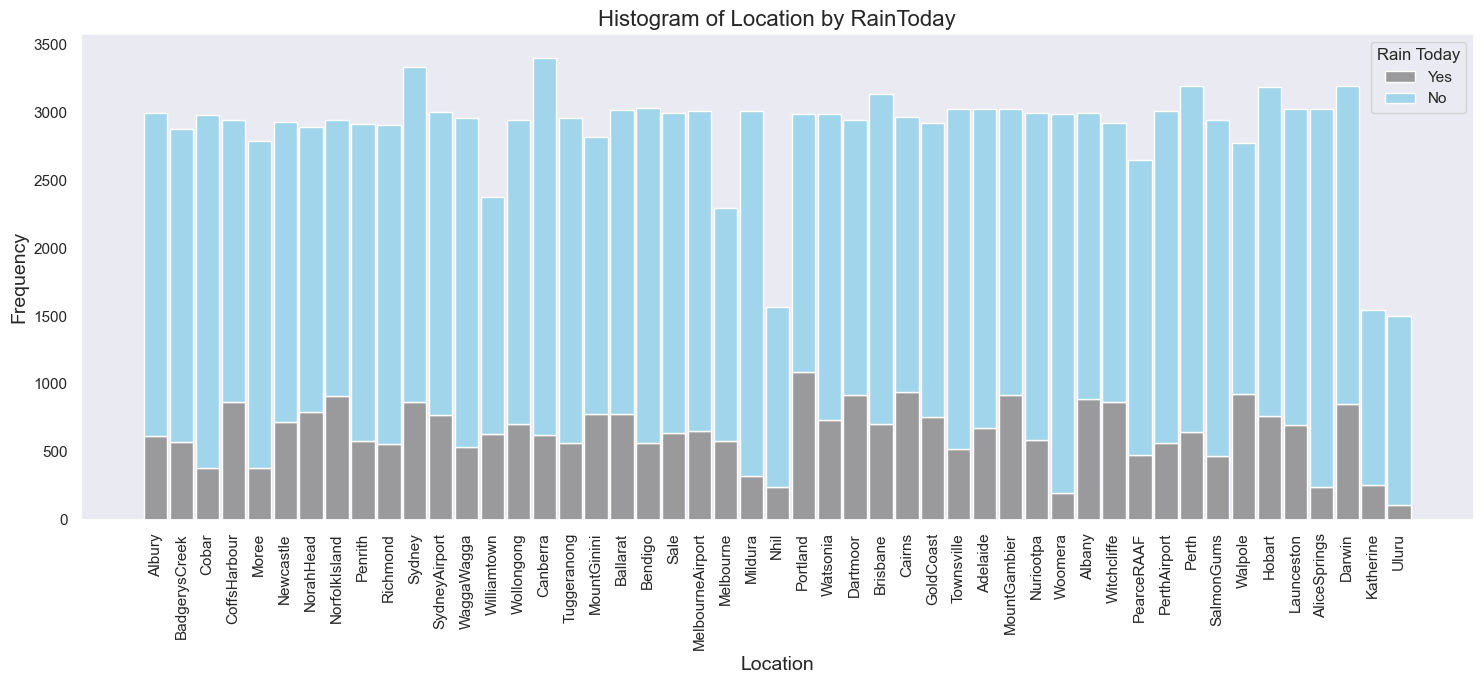

In [11]:
# Create a count plot with Seaborn
plt.figure(figsize=(15, 7))
sns.set(style='dark')
sns.histplot(
    data=weather_df,
    x="Location",
    hue="RainToday",
    multiple='stack',
    palette=["skyblue", "grey"],
    shrink=0.9)

# Customize the plot
plt.title('Histogram of Location by RainToday', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Rain Today', labels=['Yes', 'No'])

# Show the plot
plt.tight_layout()
plt.show()

The data on distribution of rainfall in all 49 location shows a relatively $uniform$ $distribution$ .
Majority of Locations show rainfall on approximately 20% of days in record.

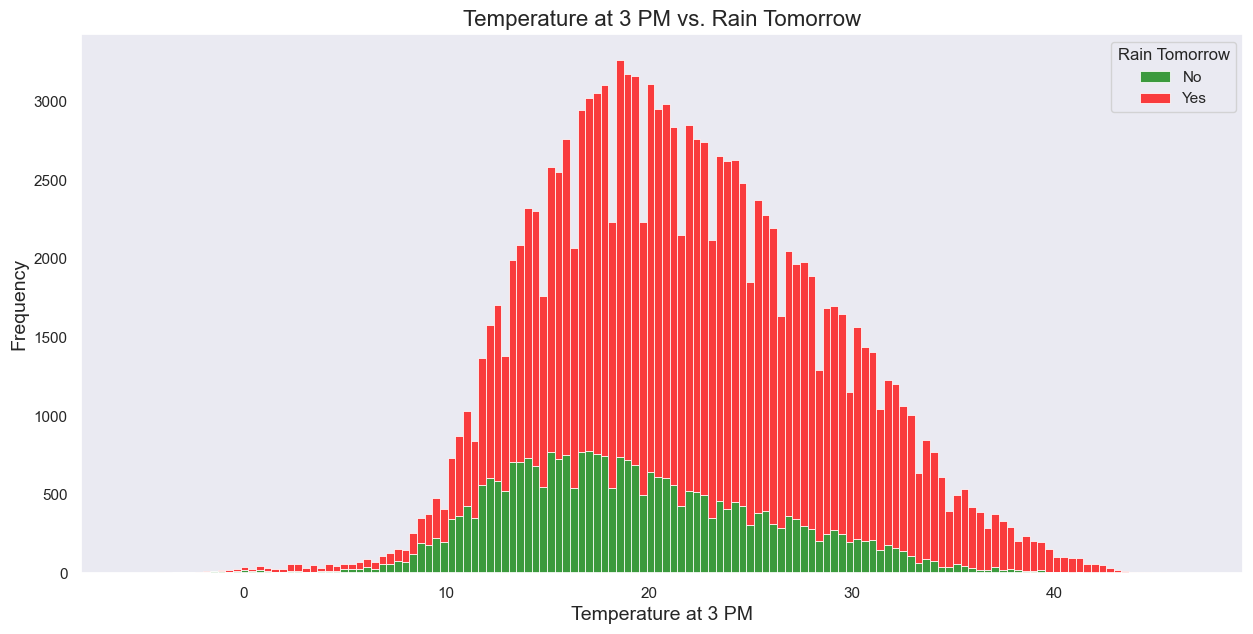

In [13]:
plt.figure(figsize=(15,7))
sns.histplot(weather_df,
             x='Temp3pm',
             hue='RainTomorrow',
             palette=['red', 'green'],
             multiple = 'stack'
             )

plt.title('Temperature at 3 PM vs. Rain Tomorrow', fontsize=16)
plt.xlabel('Temperature at 3 PM', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Rain Tomorrow', labels=['No', 'Yes'])
plt.show()


The histogram for TEMPERATURE AT 3 PM in relation to the event of rainfall on the next day seems to form a "gaussian distribution".
From the graph we can decipher that the probability of rainfall on the next day is comparatively higher when the Temperature is around 20 degrees celsius.The likelihood of rainfall reduces as the temperature varies from 20 degree celsius.Thus concluding that temperature on 3pm on the previous day can be taken into consideration to predict the likelihood of rainfall on the next day.


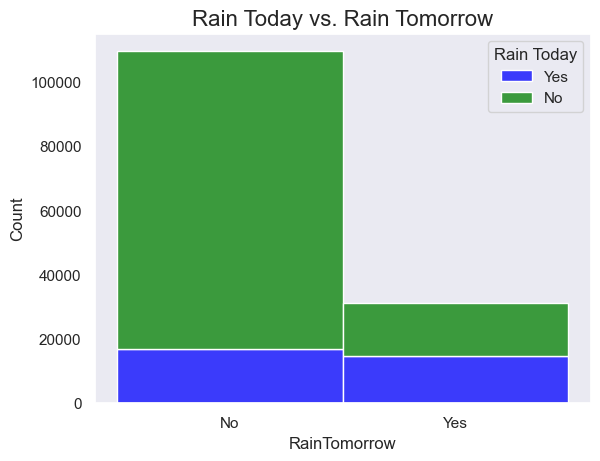

In [15]:

sns.histplot(weather_df,
             x ='RainTomorrow',
             hue = 'RainToday',
             palette=['green', 'blue'],
             multiple='stack')
plt.title('Rain Today vs. Rain Tomorrow', fontsize=16)
plt.legend(title='Rain Today',labels=['Yes', 'No'])
plt.show()

The above histogram shows the likelihood of rain fall tomorrow in comparison with the occurence of rainfall today.
The graph clearly states that on the event of no rainfall today, the chances of rainfall occuring tomorrow is very low.

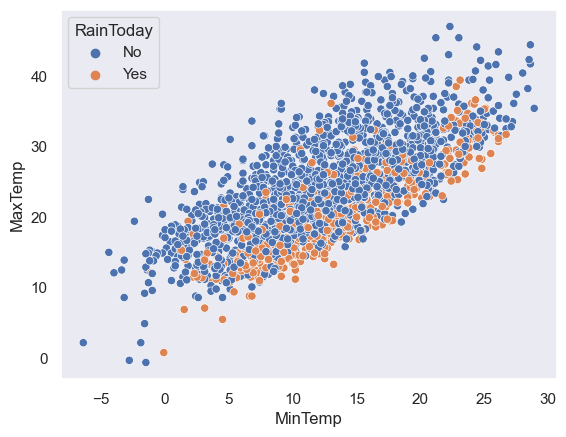

In [17]:
sample_df = weather_df.sample(n=2000, random_state=2)  
sns.scatterplot(sample_df,
                x = 'MinTemp',
                y = 'MaxTemp',
                hue = 'RainToday',
                )
plt.show()

The above scatterplot shows a positive linear relationship between the minium and maximum temperature.
The graph also shows that the chances of rainfall is higher when there is low variation between the maximum and minimum temperature on a given day.

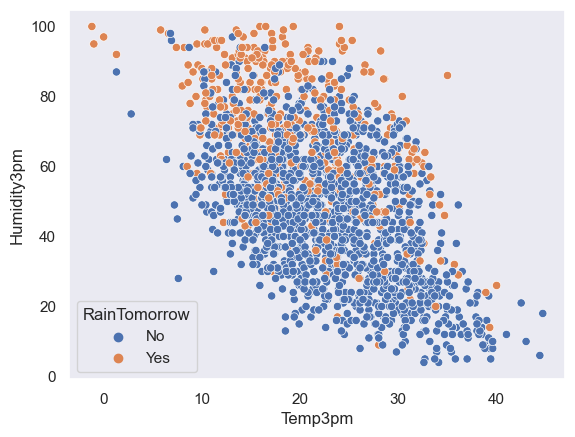

In [19]:
sample_df = weather_df.sample(n=2000, random_state=2)  
sns.scatterplot(sample_df,
                x='Temp3pm',
                y='Humidity3pm',
                hue ='RainTomorrow')
plt.show()

The above scatterplot show a somewhat negative linear relationship between the Temperature and Humidity at 3pm with relatively high variation between the data points throughout the given data.
We can also decipher from the graph that on a given day, the chances of rainfall tomorrow is higher when the humidity is high and the temperature is relatively lower on the previous day.



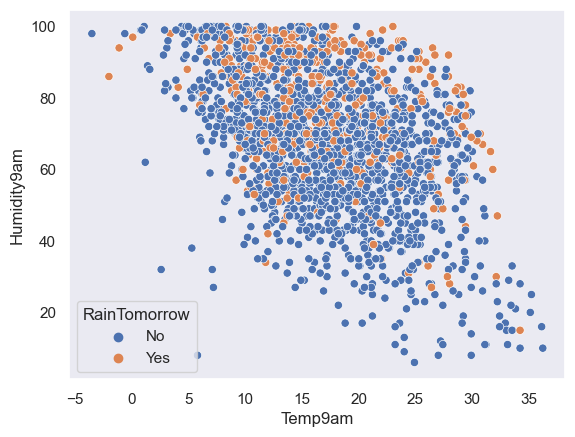

In [21]:
sample_df = weather_df.sample(n=2000, random_state=2)  
sns.scatterplot(sample_df,
                x='Temp9am',
                y='Humidity9am',
                hue ='RainTomorrow')
plt.show()

A higher humidity percentage at 9am on a given day correlates to a higher chances of rainfall on the next day.

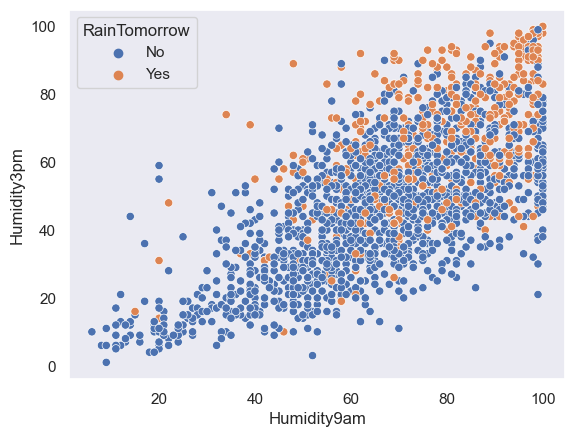

In [23]:
sample_df = weather_df.sample(n=2000, random_state=42)  
sns.scatterplot(sample_df,
                x='Humidity9am',
                y='Humidity3pm',
                hue ='RainTomorrow')
plt.show()

On a given day, when the humidity is on the higher side throughout, ,i.e. on 9am and 3pm, the chances of rainfall on the next day increases considerably.

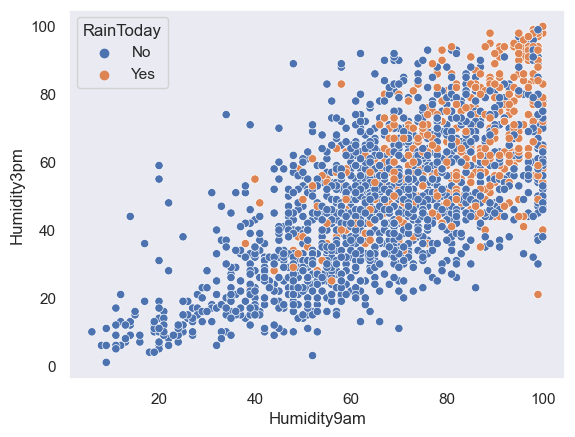

In [25]:
sample_df = weather_df.sample(n=2000, random_state=42)  
sns.scatterplot(sample_df,
                x='Humidity9am',
                y='Humidity3pm',
                hue ='RainToday')
plt.show()

On a given day, when the humidity is on the higher side throughout, ,i.e. on 9am and 3pm, the chances of rainfall on that particular day also increases considerably.

## CREATING A TRAINING, VALIDATION AND TEST SET

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_val_df, test_df = train_test_split(weather_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [30]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


In [31]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
12319,2009-09-10,Moree,4.1,21.7,0.0,4.6,11.3,WNW,31.0,NNW,...,53.0,20.0,1019.3,1016.9,0.0,1.0,14.1,20.9,No,No
88560,2012-09-21,Cairns,18.9,30.0,0.0,8.0,11.1,NNE,30.0,S,...,54.0,38.0,1018.5,1013.7,1.0,1.0,25.7,29.2,No,No
42526,2017-06-05,Williamtown,7.3,18.5,0.2,NaN,NaN,NW,26.0,NW,...,94.0,60.0,1024.9,1021.6,6.0,NaN,10.6,18.0,No,No
139212,2008-10-10,Darwin,24.8,35.5,0.0,5.0,10.4,N,46.0,SE,...,80.0,52.0,1014.1,1010.4,3.0,2.0,28.5,32.9,No,No
25223,2012-01-01,Penrith,13.2,32.3,0.0,NaN,NaN,ENE,22.0,N,...,72.0,34.0,NaN,NaN,NaN,NaN,20.7,30.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141207,2014-06-25,Darwin,16.0,29.9,0.0,5.0,11.0,ESE,48.0,SE,...,38.0,17.0,1018.1,1013.3,0.0,0.0,20.1,29.4,No,No
95983,2016-07-24,Townsville,16.8,27.8,0.0,4.4,NaN,NNE,24.0,NaN,...,91.0,58.0,1016.6,1013.5,NaN,NaN,22.4,26.8,No,No
39457,2017-04-06,WaggaWagga,8.5,24.8,0.0,4.8,NaN,E,28.0,E,...,56.0,24.0,1025.5,1021.9,NaN,NaN,16.9,24.7,No,No
92898,2016-06-09,GoldCoast,12.7,26.9,0.0,NaN,NaN,NNW,31.0,NW,...,51.0,58.0,1014.3,1011.8,NaN,NaN,20.2,23.5,No,No


In [32]:
val_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
66675,2016-01-18,MelbourneAirport,20.6,36.5,0.0,13.6,12.7,NNE,59.0,N,...,19.0,12.0,1016.0,1012.6,2.0,4.0,27.9,35.7,No,No
46564,2010-07-05,Canberra,-3.7,12.8,0.0,1.0,4.2,E,17.0,NaN,...,94.0,58.0,1028.8,1024.3,8.0,7.0,2.5,12.6,No,Yes
23336,2015-04-26,NorfolkIsland,20.5,22.9,0.2,4.2,0.0,N,70.0,N,...,82.0,88.0,1014.2,1010.8,8.0,8.0,21.7,21.8,No,Yes
82920,2014-07-05,Dartmoor,8.6,13.5,9.0,1.4,4.5,WSW,46.0,W,...,100.0,100.0,1014.7,1015.4,NaN,NaN,10.6,11.3,Yes,Yes
15526,2010-02-24,Newcastle,20.8,25.2,0.0,NaN,NaN,NaN,NaN,SE,...,59.0,55.0,NaN,NaN,8.0,8.0,22.1,24.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35520,2014-09-21,SydneyAirport,11.3,19.1,0.4,3.6,8.0,WSW,41.0,SSW,...,71.0,47.0,1030.4,1027.4,6.0,2.0,15.6,17.9,No,No
113499,2014-06-01,Witchcliffe,10.7,18.4,11.0,NaN,NaN,NW,33.0,W,...,73.0,88.0,1016.4,1017.3,NaN,NaN,17.1,15.9,Yes,No
58377,2009-07-24,Bendigo,-2.6,11.7,0.0,1.2,NaN,NW,35.0,NaN,...,94.0,53.0,1026.1,1023.7,1.0,5.0,3.2,11.6,No,No
128594,2014-01-29,Walpole,10.8,25.5,0.0,NaN,NaN,SSW,35.0,NE,...,55.0,54.0,1017.5,1012.9,NaN,NaN,20.0,24.5,No,No


In [33]:
test_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
121459,2010-09-30,Perth,18.2,25.0,0.0,9.4,1.5,SE,33.0,SE,...,41.0,34.0,1011.1,1009.6,7.0,7.0,19.2,24.4,No,No
32051,2013-06-18,Sydney,8.0,19.2,0.0,1.6,8.0,S,43.0,W,...,76.0,52.0,1013.5,1012.2,1.0,2.0,9.6,16.1,No,Yes
107700,2015-02-06,Woomera,19.1,38.5,0.0,11.4,12.8,ENE,52.0,ESE,...,21.0,9.0,1017.5,1014.8,2.0,0.0,25.2,37.0,No,No
26526,2015-09-24,Penrith,8.4,17.5,0.0,NaN,NaN,S,54.0,SSW,...,47.0,44.0,NaN,NaN,NaN,NaN,13.5,15.4,No,No
109566,2011-09-22,Albany,9.5,14.5,2.4,3.0,5.3,NaN,NaN,SW,...,58.0,53.0,1021.6,1022.3,6.0,6.0,12.2,13.8,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17003,2014-06-09,Newcastle,7.0,19.4,0.2,NaN,NaN,NaN,NaN,NaN,...,76.0,75.0,NaN,NaN,5.0,6.0,11.8,16.4,No,Yes
90988,2010-12-19,GoldCoast,21.0,23.4,2.2,NaN,NaN,SSE,37.0,SW,...,76.0,91.0,1006.7,1005.4,NaN,NaN,21.9,18.8,Yes,Yes
38277,2014-01-12,WaggaWagga,18.8,39.0,0.0,10.2,13.5,WNW,46.0,E,...,38.0,12.0,1015.7,1012.4,0.0,2.0,27.4,37.4,No,No
100247,2010-12-05,MountGambier,15.7,32.8,0.0,6.0,8.6,SE,52.0,ENE,...,65.0,34.0,1010.5,1007.3,2.0,7.0,23.5,32.7,No,Yes


## IDENTIFYING INPUT AND TARGET COLUMNS


Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Date` column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

We will then create a list of input columns, and also identify the target column.

In [36]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [38]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [39]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [40]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [41]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
12319,Moree,4.1,21.7,0.0,4.6,11.3,WNW,31.0,NNW,W,...,20.0,53.0,20.0,1019.3,1016.9,0.0,1.0,14.1,20.9,No
88560,Cairns,18.9,30.0,0.0,8.0,11.1,NNE,30.0,S,ENE,...,20.0,54.0,38.0,1018.5,1013.7,1.0,1.0,25.7,29.2,No
42526,Williamtown,7.3,18.5,0.2,NaN,NaN,NW,26.0,NW,WSW,...,6.0,94.0,60.0,1024.9,1021.6,6.0,NaN,10.6,18.0,No
139212,Darwin,24.8,35.5,0.0,5.0,10.4,N,46.0,SE,N,...,30.0,80.0,52.0,1014.1,1010.4,3.0,2.0,28.5,32.9,No
25223,Penrith,13.2,32.3,0.0,NaN,NaN,ENE,22.0,N,ENE,...,7.0,72.0,34.0,NaN,NaN,NaN,NaN,20.7,30.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141207,Darwin,16.0,29.9,0.0,5.0,11.0,ESE,48.0,SE,ESE,...,30.0,38.0,17.0,1018.1,1013.3,0.0,0.0,20.1,29.4,No
95983,Townsville,16.8,27.8,0.0,4.4,NaN,NNE,24.0,NaN,NE,...,13.0,91.0,58.0,1016.6,1013.5,NaN,NaN,22.4,26.8,No
39457,WaggaWagga,8.5,24.8,0.0,4.8,NaN,E,28.0,E,ENE,...,13.0,56.0,24.0,1025.5,1021.9,NaN,NaN,16.9,24.7,No
92898,GoldCoast,12.7,26.9,0.0,NaN,NaN,NNW,31.0,NW,NNE,...,26.0,51.0,58.0,1014.3,1011.8,NaN,NaN,20.2,23.5,No


In [42]:
train_targets

12319     No
88560     No
42526     No
139212    No
25223     No
          ..
141207    No
95983     No
39457     No
92898     No
122949    No
Name: RainTomorrow, Length: 84471, dtype: object

Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [44]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [45]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,84192.000000,84278.000000,84471.000000,48625.000000,44390.000000,79050.000000,83816.000000,82908.000000,83563.000000,82343.000000,76167.000000,76140.000000,52838.000000,50816.000000,84075.000000,82867.000000
mean,12.166808,23.222435,2.346884,5.468004,7.633936,39.975142,13.991947,18.648430,68.825030,51.440098,1017.658514,1015.265201,4.432246,4.494411,16.969566,21.680557
std,6.411351,7.124983,8.505389,4.172450,3.781045,13.540478,8.855024,8.762697,19.059801,20.828580,7.110012,7.043561,2.886058,2.718447,6.506199,6.948260
min,-8.500000,-3.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,982.000000,977.100000,0.000000,0.000000,-7.000000,-5.100000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.300000,135.000000,87.000000,83.000000,100.000000,100.000000,1041.000000,1038.400000,9.000000,9.000000,39.400000,46.700000


In [46]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## IMPUTING MISSING NUMERIC DATA

Machine learning models can't work with missing numerical data. Hence we will impute the missing values.

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [49]:
from sklearn.impute import SimpleImputer

In [50]:
imputer = SimpleImputer(strategy = 'mean')

Before we perform imputation, let's check the no. of missing values in each numeric column.

In [52]:
weather_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [53]:
train_inputs[numeric_cols].isna().sum()

MinTemp            279
MaxTemp            193
Rainfall             0
Evaporation      35846
Sunshine         40081
WindGustSpeed     5421
WindSpeed9am       655
WindSpeed3pm      1563
Humidity9am        908
Humidity3pm       2128
Pressure9am       8304
Pressure3pm       8331
Cloud9am         31633
Cloud3pm         33655
Temp9am            396
Temp3pm           1604
dtype: int64

In [54]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


The first step in imputation is to `fit` the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset. 

In [56]:
imputer.fit(weather_df[numeric_cols])

SimpleImputer()

In [57]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [58]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [61]:
weather_df[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


Using `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()

In [65]:
scaler.fit(weather_df[numeric_cols])

MinMaxScaler()

We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.

In [67]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [68]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000
mean,0.487426,0.529725,0.006326,0.037724,0.526367,0.263371,0.107630,0.214346,0.688250,0.514403,0.614184,0.610632,0.492427,0.499593,0.509908,0.519785
std,0.150961,0.134534,0.022926,0.021832,0.189030,0.101541,0.067851,0.099784,0.189571,0.205645,0.111595,0.106995,0.253618,0.234274,0.136939,0.132092
min,0.000000,0.018904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.024793,0.000000,0.000000,0.000000,0.004219,0.005758
25%,0.379717,0.429112,0.000000,0.027586,0.526244,0.193798,0.053846,0.149425,0.570000,0.370000,0.545455,0.542400,0.333333,0.444444,0.411392,0.424184
50%,0.483491,0.519849,0.000000,0.037741,0.526244,0.255814,0.100000,0.214151,0.700000,0.514493,0.614125,0.610527,0.492351,0.499917,0.504219,0.512476
75%,0.596698,0.623819,0.002156,0.037741,0.606897,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.676800,0.666667,0.666667,0.605485,0.608445
max,1.000000,1.000000,1.000000,1.000000,0.986207,1.000000,0.669231,0.954023,1.000000,1.000000,1.000000,0.980800,1.000000,1.000000,0.983122,1.000000


## TRAINING A LOGISTIC REGRESSION MODEL

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression(solver='liblinear')

In [74]:
model.fit(train_inputs[numeric_cols], train_targets)

LogisticRegression(solver='liblinear')

`model.fit` uses the following workflow for training the model:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


In [76]:
print(model.coef_.tolist())

[[0.1752870483519357, -2.2921219936206185, 6.517565762820154, -0.5916806311028563, -1.7314804630025904, 6.65355891056626, -1.372794747072762, -1.928396090113819, 0.7689713995538321, 5.323434446725077, 4.41915162466014, -8.632841744281139, -0.03398105393771758, 1.174160140496508, 1.059075119455148, 1.3572550634206149]]


In [78]:
print(model.intercept_)

[-3.54230704]


Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.

## Making predictions and evaluating the model

In [86]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [88]:
train_preds = model.predict(X_train)

In [90]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [92]:
train_targets

12319     No
88560     No
42526     No
139212    No
25223     No
          ..
141207    No
95983     No
39457     No
92898     No
122949    No
Name: RainTomorrow, Length: 84471, dtype: object

In [94]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.99449868, 0.00550132],
       [0.97673542, 0.02326458],
       [0.89412097, 0.10587903],
       ...,
       [0.98712308, 0.01287692],
       [0.8924429 , 0.1075571 ],
       [0.98728771, 0.01271229]])

In [96]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [98]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(train_targets, train_preds)

0.8444554936013543

The model achieves an accuracy of 85.17% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.


In [103]:
from sklearn.metrics import confusion_matrix

Defining a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [106]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94654819, 0.05345181],
       [0.51620519, 0.48379481]])

In [108]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 84.45%


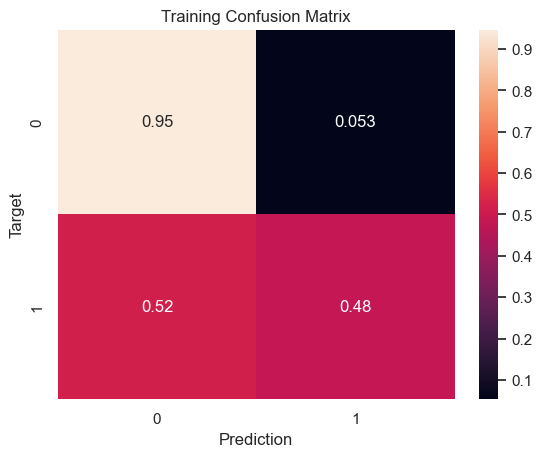

In [110]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 84.26%


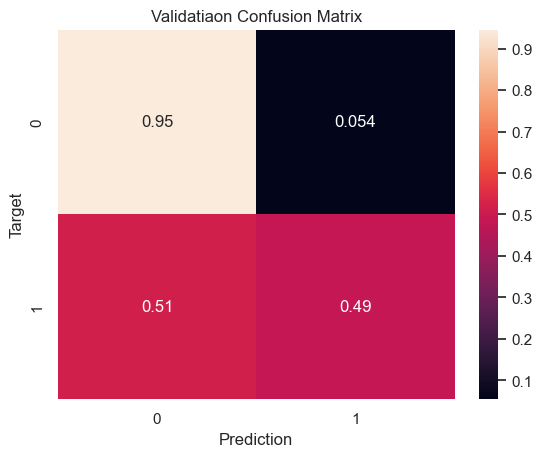

In [112]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 84.20%


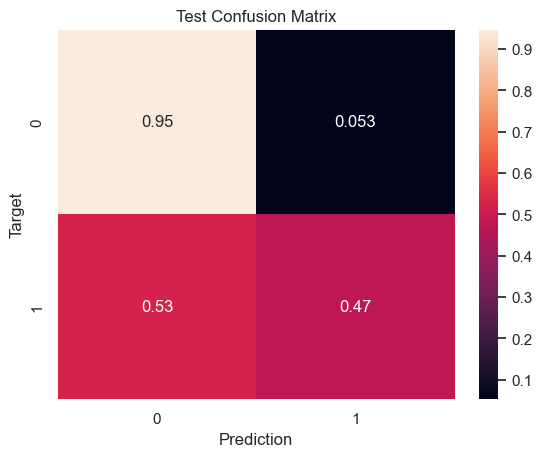

In [114]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

The accuracy of the model on the test and validation set are above 84%, which suggests that our model generalizes well to data it hasn't seen before. 
